## Figure4-1 The comparison of full lifecycle costs (Int$ 2020) between the CACTUS database and Narok town as of September 2022. The faecal sludge management (FSM) systems' lifecycle costs are shown in the left side of vertical line, and the sewage systems' cost are presented in the other side. The median values are used to draw the full lifecycle costs for the CACTUS database. The dashed dotted lines express the most expensive cost in Narok town while the dotted lines show the cheapest cost in the city.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path
import numpy as np

In [217]:
# variables
path_excel = r'data.xlsx'
sheet_name = 'full_lifecycle_cost_compare'
file_path = r'fig4-1_fulllifecycle_cost_comparison.png'
dpi = 700

plt.rcParams['font.size'] = 14

In [218]:
df = pd.read_excel(
    path_excel, 
    sheet_name=sheet_name,
)

print(df)

                                           Components  containment  \
0   Infiltrating pit, mechanical emptying and mech...       125.29   
1   Infiltrating pit, mechanical emptying and pass...       125.29   
2   Sealed tank, mechcanical emptying and mechine-...        70.90   
3   Sealed tank, mechcanical emptying and passive ...        70.90   
4                 The costiest FSM system, Narok town       223.00   
5                 The cheapest FSM system, Narok town       188.00   
6   Direct, combined pipes with pumping and machin...       118.42   
7   Direct, combined pipes with pumping and passiv...       118.42   
8   Direct, combined pipes without pumping and mac...       118.42   
9   Direct, combined pipes without pumping and pas...       118.42   
10  Direct, separate pipes with pumping and machin...       118.42   
11  Direct, separate pipes with pumping and passiv...       118.42   
12               Sewage system, Narok town in present       179.00   
13       Sewage syst

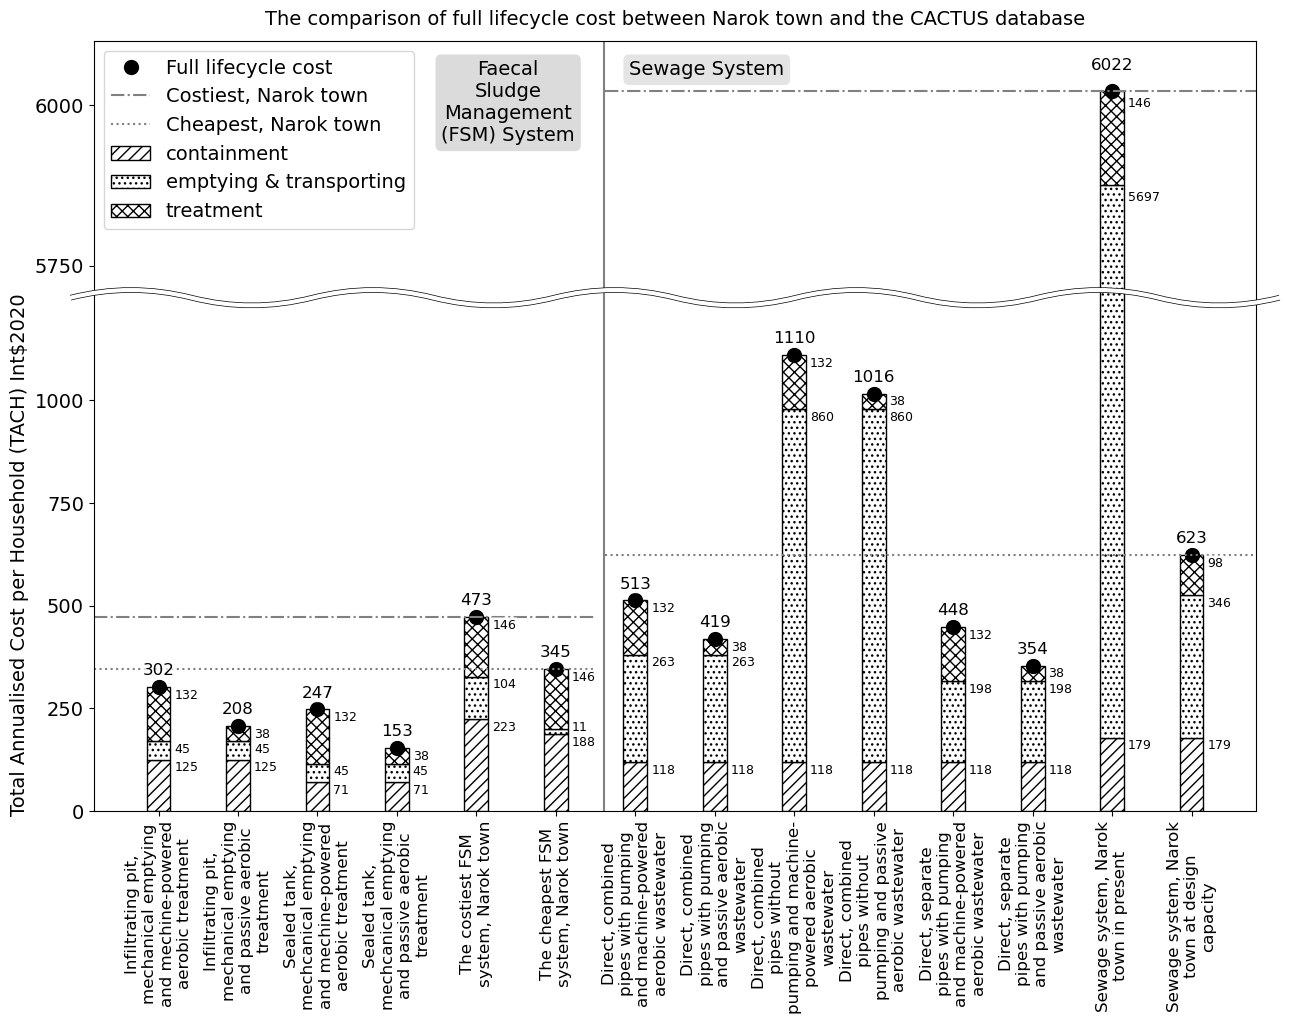

In [226]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 10), sharex='col',
                       gridspec_kw={'height_ratios': (1,2)} )

fig.patch.set_facecolor('white') # 背景色を「白」に設定

hatches = ['///', '...', 'xxx'] 
labels = []
# labels.append("Full lifecycle cost")

for index, ax in enumerate(axs):
    bottom = None
    total = np.zeros(len(df))
    for i, column in enumerate(df.columns[1:]):
        bar = ax.bar(
            df.iloc[:, 0], 
            df[column], 
            width=0.3,
            color='w', 
            edgecolor='k', 
            bottom=bottom, 
            label=column, 
            hatch=hatches[i % len(hatches)]
        )
        bottom = df[column] if bottom is None else bottom + df[column]
        total += df[column]
        if index == 1:
            labels.append(column)

        # バーの高さに合わせてラベルを表示する
        for j, value in enumerate(df[column]): 
            if index == 0:
               if bottom[j] < 5000:
                continue
            else:
                if bottom[j] > 5000:
                    continue
            y = bottom[j] - 20
            if j == 5 and i == 1:
                y = bottom[j] + 5
            ax.text(
                j + 0.2, 
                y, 
                int(round(value)), 
                ha='left', 
                va='center', 
                fontsize=9,
                bbox=dict(boxstyle='round, pad=0.1', facecolor='w', edgecolor='none', alpha=0.7))
    
    # add vertial line to separate FSM and Sewage
    for i in range(len(df)-1):
        if i == 5:
            ax.axvline(i + 0.6, color='grey', linestyle='-', alpha=1)
    
    # 積み上げグラフの合計値をプロットする
    for j, value in enumerate(total):
        if index == 0:
            if value < 5000:
                continue
        else:
            if value > 5000:
                continue

        ax.plot(
            j, 
            value, 
            color='k', 
            linestyle='', 
            marker='o', 
            markersize=10, 
            label='Full lifecycle cost')
        
        ax.text(
            j,
            value + 40,
            int(round(value)),
            ha='center',
            va='center',
            fontsize=12,
            bbox=dict(boxstyle='round, pad=0.1', facecolor='w', edgecolor='none', alpha=0.7)
        )

axs[0].axhline(y=6022,xmin=0.44, xmax=1, color='grey', linestyle='-.', alpha=1, label='Costiest, Narok town')
axs[0].axhline(y=623,xmin=0.44, xmax=1, color='grey', linestyle=':', alpha=1, label='Cheapest, Narok town')
axs[1].axhline(y=623,xmin=0.44, xmax=1, color='grey', linestyle=':', alpha=1)
axs[1].axhline(y=473,xmin=0, xmax=0.43, color='grey', linestyle='-.', alpha=1)
axs[1].axhline(y=345,xmin=0, xmax=0.43, color='grey', linestyle=':', alpha=1)

axs[0].legend(loc='upper left')

xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in df.iloc[:, 0] ]
axs[1].set_xticks(range(len(xtick_labels)))
axs[1].set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

fig.subplots_adjust(hspace=0.0)  

# 下段サブプロット
axs[1].set_ylim(0,1250)  # 区間幅 400
axs[1].set_yticks(np.arange(0,1250,250))

# 上段サブプロット
axs[0].set_ylim(5700,6100)  # 区間幅 200
axs[0].set_yticks(np.arange(5750,6100,250))

# 下段のプロット領域上辺を非表示
axs[1].spines['top'].set_visible(False)

# 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 

## ニョロ線の描画
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=axs[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=axs[1].transAxes, zorder=10,
                           capstyle='round')

a = axs[1].add_patch(line1)
a = axs[1].add_patch(line2)

axs[0].set_title('The comparison of full lifecycle cost between Narok town and the CACTUS database', loc='center', x=0.5, y=1.03, fontsize=14)
axs[1].set_ylabel('Total Annualised Cost per Household (TACH) Int$2020', fontsize=14)

axs[0].text(4.4, 6070, 'Faecal\nSludge\nManagement\n(FSM) System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
axs[0].text(6.9, 6070, 'Sewage System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6, boxstyle='round'))

plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()